In [12]:
import pandas as pd

In [13]:
!pip install geopy

In [14]:
from geopy.geocoders import Nominatim

In [15]:
geolocater = Nominatim(user_agent = "city_geolocater")

In [16]:
def get_lat_long(city):
  location = geolocater.geocode(city)
  if location:
    return location.latitude,location.longitude
  else:
    return None, None

In [17]:
lat,lon = get_lat_long('Troy, NY')

print(lat,lon)

42.7284117 -73.6917878


In [18]:
filename = 'gun_violence_data.csv'

# Bellis
#filename = 'gun_violence_school_shootings.csv'

df = pd.read_csv(filename)

df

,Incident ID,Incident Date,State,City Or County,Address,Business/Location Name,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,2713018,"September 22, 2023",North Carolina,Rocky Mount,991 S Winstead Ave,Winstead Avenue Elementary,0,0,0,0,0,NaN
1,2712953,"September 22, 2023",Tennessee,Nashville,3150 McGavock Pike,McGavock High School,0,0,0,0,1,NaN
2,2712398,"September 21, 2023",Alabama,Anniston,4401 Saks Rd,Saks High School,0,0,0,0,1,NaN
3,2712502,"September 21, 2023",Florida,Milton,5445 King Arthurs Way,Avalon Middle School,0,0,0,0,2,NaN
4,2711513,"September 20, 2023",Maryland,Hyattsville (Landover),6501 Columbia Park Rd,Fairmont Heights High School,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2180889,"December 2, 2021",Wisconsin,Madison,702 Pflaum Rd,La Follette High School,0,0,0,0,1,NaN
1996,2180722,"December 2, 2021",Texas,Katy,23440 Cinco Ranch Blvd,Cinco Ranch HS,0,0,0,0,0,NaN
1997,2182816,"December 2, 2021",North Carolina,Charlotte,1100 Eastway Dr,Garinger High School,0,0,0,0,0,NaN
1998,2182146,"December 2, 2021",Texas,Houston,4400 Aldine Mail Rte Rd,MacArthur Senior High School,0,0,0,0,1,NaN


In [19]:
import numpy as np
def get_lat_long(entry):
    geolocator = Nominatim(user_agent="your_app_name", timeout=10)  # Set a higher timeout value

    try:
        location = geolocator.geocode(entry)
        if location:
            return location.latitude, location.longitude
        else:
            return np.nan, np.nan
    except Exception as e:
        print(f"Error: {e}")
        return np.nan, np.nan

# Your existing code for retrieving latitudes and longitudes
nentries = 2000

lats = -999 * np.ones(nentries, dtype=float)
lons = -999 * np.ones(nentries, dtype=float)

for i in range(nentries):
    state = df.iloc[i]['State']
    city = df.iloc[i]['City Or County']
    entry = f"{city}, {state}"

    lat, lon = get_lat_long(entry)
    print(i, lat, lon)

    lats[i] = lat
    lons[i] = lon

0 35.9423833 -77.7956949
1 36.1622767 -86.7742984
2 33.6624824 -85.8283224
3 30.6324149 -87.0396881
4 38.9321725 -76.8995003
5 33.2095614 -87.5675258
6 41.1153371 -78.7746056
7 32.2998686 -90.1830408
8 38.5135805 -89.9841627
9 39.2156213 -76.8582049
10 29.4246002 -98.4951405
11 34.1112226 -82.8670839
12 42.2625621 -71.8018877
13 38.2009055 -84.8732836
14 40.1936892 -85.3865271
15 36.264818500000004 -80.84776715501519
16 33.9255685 -116.875289
17 41.5680898 -87.7203257
18 39.1134562 -94.626497
19 36.8524545 -121.4016021
20 39.7589478 -84.1916069
21 44.88300545 -93.32131503185957
22 34.7494749 -77.4208221
23 34.1142554 -85.6004514
24 43.6763036 -70.3663874
25 42.702266 -114.286704
26 38.2542376 -85.759407
27 30.3674198 -89.0928155
28 32.4600136 -86.4753174
29 42.6414437 -71.3085329
30 40.08067 -76.2411283
31 35.9131542 -79.05578
32 39.6828358 -75.7515682
33 29.0281051 -81.3034183
34 27.4989278 -82.5748194
35 30.829635 -90.6677355
36 35.7803977 -78.6390989
37 34.769536 -92.2670941
38 26.2

In [20]:
print(len(lats))
print(len(lons))
print(len(df))

df['lat'] = lats
df['lon'] = lons

2000
2000
2000


(25.0, 50.0)

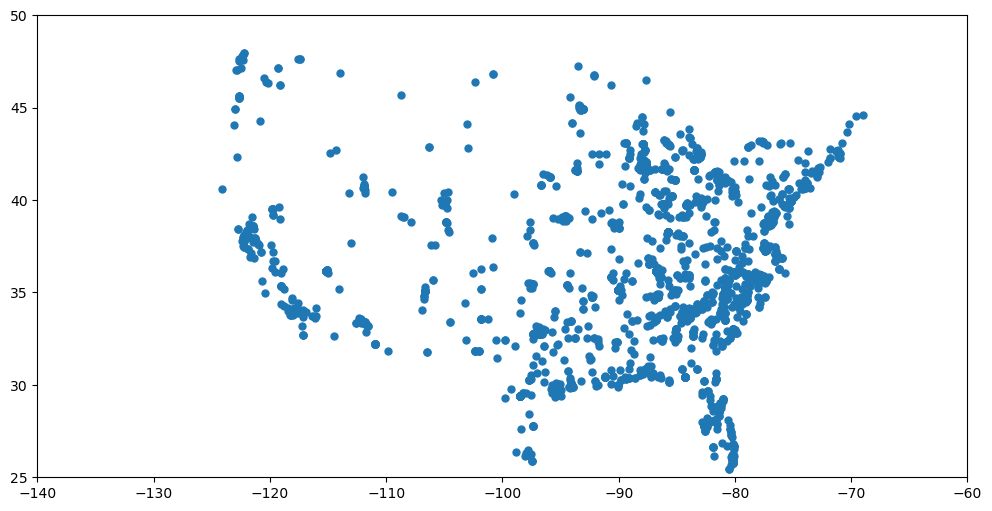

In [22]:
import matplotlib.pylab as plt

plt.figure(figsize=(12,6))
plt.plot(lons,lats,'o', markersize=5)

plt.xlim(-140, -60)
plt.ylim(25,50)
